<a href="https://colab.research.google.com/github/fdsig/A-Lamp/blob/master/vit_visualise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<a href="http://colab.research.google.com/github/hirotomusiker/schwert_colab_data_storage/blob/master/notebook/Vision_Transformer_Tutorial.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>  


credits:
- Paper: Alexey Dosovitskiy et al., "An Image Is Worth 16x16 Words: Transformers for Image Recognition at Scale", 
https://arxiv.org/abs/2010.11929
- Model Implementation: this notebook loads (and is inspired by) Ross Wightman (@wightmanr)'s amazing module: https://github.com/rwightman/pytorch-image-models/tree/master/timm . For the detailed codes, please refer to the repo.
- The copyright of figures and demo images belongs to Hiroto Honda.



# Preparation

In [ ]:
%%capture
!pip install timm

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL

import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T

from timm import create_model

# Prepare Model and Data

In [ ]:
model_name = "vit_base_patch16_224"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# create a ViT model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer.py
model = create_model(model_name, pretrained=True).to(device)

device =  cuda


In [ ]:
# Define transforms for test
IMG_SIZE = (224, 224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)
transforms = [
              T.Resize(IMG_SIZE),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

In [ ]:
!pip install torchviz && pip install hiddenlayer
import hiddenlayer as hl
hl.build_graph(model, torch.zeros([1, 3, 224, 224]).to(device))

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=d04d3b7c4c91ca8922f2136ea9407ccf3b89daf1678335aceaef2c74ad846b10
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


/usr/local/lib/python3.7/dist-packages/timm/models/layers/patch_embed.py:33: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert H == self.img_size[0] and W == self.img_size[1], \
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/onnx/sym

RuntimeError: ignored

In [ ]:
from torchsummary import summary
summary(model, (3,224,224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 768, 14, 14]         590,592
          Identity-2             [-1, 196, 768]               0
        PatchEmbed-3             [-1, 196, 768]               0
           Dropout-4             [-1, 197, 768]               0
         LayerNorm-5             [-1, 197, 768]           1,536
            Linear-6            [-1, 197, 2304]       1,771,776
           Dropout-7         [-1, 12, 197, 197]               0
            Linear-8             [-1, 197, 768]         590,592
           Dropout-9             [-1, 197, 768]               0
        Attention-10             [-1, 197, 768]               0
         Identity-11             [-1, 197, 768]               0
        LayerNorm-12             [-1, 197, 768]           1,536
           Linear-13            [-1, 197, 3072]       2,362,368
             GELU-14            [-1, 19

In [ ]:
import torch.nn as nn
model = create_model(model_name, pretrained=True).to(device)
model = nn.Sequential(
    model,
    nn.Linear(1000,10),
    nn.Softmax(dim=1)
)
model.to(device)
x = torch.randn(1,3, 224,224).to(device)
sum(model(x)[0])

tensor(1.0000, device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
  model = create_model(
        'convit_tiny',
        pretrained=True,
        num_classes=1000,
        drop_rate=0,
        drop_path_rate=0.1,
        drop_block_rate=None,
        #local_up_to_layer=10,
        #locality_strength=1.0,
        #embed_dim=48
    )
num_ftrs = model.head.in_features
model.head = nn.Linear(num_ftrs, 2)

In [ ]:
model.to(device)
summary(model, (3,224,224))
x = torch.randn(1,3, 224,224).to(device)
sum(model(x)[0])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 192, 14, 14]         147,648
          Identity-2             [-1, 196, 192]               0
        PatchEmbed-3             [-1, 196, 192]               0
           Dropout-4             [-1, 196, 192]               0
         LayerNorm-5             [-1, 196, 192]             384
            Linear-6             [-1, 196, 384]          73,728
            Linear-7          [-1, 196, 196, 4]              16
           Dropout-8          [-1, 4, 196, 196]               0
            Linear-9             [-1, 196, 192]          36,864
           Linear-10             [-1, 196, 192]          37,056
          Dropout-11             [-1, 196, 192]               0
             GPSA-12             [-1, 196, 192]               0
         Identity-13             [-1, 196, 192]               0
        LayerNorm-14             [-1, 1

tensor(1.0161, device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
from google.colab import drive
drive.mount('drive')
model_check = 'drive/MyDrive/0.AVA/results/convt_tiny_fb/checkpoint.pth'

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
loaded = torch.load(model_check)
model.load_state_dict(loaded['model'])

<All keys matched successfully>

In [ ]:
loaded['model']

OrderedDict([('cls_token',
              tensor([[[-1.1852e-02,  3.8055e-03, -5.5512e-03,  4.5150e-03, -6.6071e-03,
                         6.8588e-03, -1.6866e-03,  2.2474e-02, -1.6863e-02, -1.0662e-02,
                        -5.7693e-03,  1.1223e-02, -1.3573e-02,  5.0540e-03, -1.7659e-03,
                         9.5294e-03, -2.1462e-02,  1.5709e-02,  8.6838e-03, -1.1597e-02,
                         1.4466e-02, -1.9592e-03, -2.2823e-03,  1.1330e-02,  4.0872e-04,
                        -2.6508e-03, -2.9690e-02,  1.4314e-02,  1.8577e-03,  4.4698e-03,
                        -4.0530e-03, -9.8114e-03, -1.2879e-02, -1.0386e-02, -2.0005e-02,
                        -3.5150e-03, -1.3118e-02, -1.5349e-02, -1.2402e-02, -1.0792e-02,
                         6.8404e-04, -3.9472e-03,  2.2447e-04,  1.8742e-02,  3.7665e-04,
                        -2.4079e-03,  4.7472e-03,  1.4897e-03, -3.1189e-03, -1.9615e-02,
                         1.8928e-02, -5.1856e-03, -6.7646e-03,  8.8809e-03,  8.2977

In [ ]:
%%capture
# ImageNet Labels
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))

# Demo Image
!wget https://github.com/hirotomusiker/schwert_colab_data_storage/blob/master/images/vit_demo/santorini.png?raw=true -O santorini.png
img = PIL.Image.open('santorini.png')
img_tensor = transforms(img).unsqueeze(0).to(device)

# Simple Inference

In [ ]:
# end-to-end inference
output = model(img_tensor)

Inference Result:
goldfish, Carassius_auratus



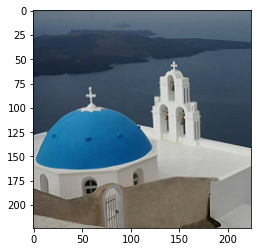

In [ ]:
print("Inference Result:")
print(imagenet_labels[int(torch.argmax(output))])
plt.imshow(img)

# Dig into Vision Transformer

Let's look at the details of the Vision Transformer!


<img src='https://github.com/hirotomusiker/schwert_colab_data_storage/blob/master/images/vit_demo/vit_input.png?raw=true'>

Figure 1. Vision Transformer inference pipeline.  
1. Split Image into Patches  
The input image is split into 14 x 14 vectors with dimension of 768 by Conv2d (k=16x16) with stride=(16, 16). 
2. Add Position Embeddings  
Learnable position embedding vectors are added to the patch embedding vectors and fed to the transformer encoder. 
3. Transformer Encoder  
The embedding vectors are encoded by the transformer encoder. The dimension of input and output vectors are the same. Details of the encoder are depicted in Fig. 2.
4. MLP (Classification) Head  
The 0th output from the encoder is fed to the MLP head for classification to output the final classification results.


# 1. Split Image into Patches

The input image is split into N patches (N = 14 x 14 for ViT-Base)
and converted to D=768 embedding vectors by learnable 2D convolution:
```
Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
```

In [ ]:
patches = model.patch_embed(img_tensor).to(device)  # patch embedding convolution
print(patches.shape)
print("Image tensor: ", img_tensor.shape)
print("Patch embeddings: ", patches.shape)

torch.Size([1, 196, 192])
Image tensor:  torch.Size([1, 3, 224, 224])
Patch embeddings:  torch.Size([1, 196, 192])


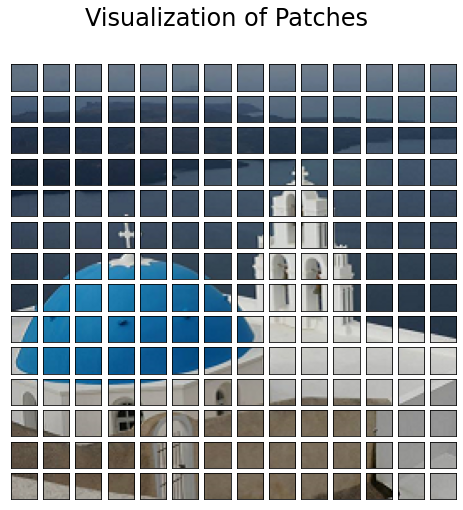

In [ ]:
# This is NOT a part of the pipeline.
# Actually the image is divided into patch embeddings by Conv2d 
# with stride=(16, 16) shown above.
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of Patches", fontsize=24)
fig.add_axes()
img = np.asarray(img)
for i in range(0, 196):
    x = i % 14
    y = i // 14
    patch = img[y*16:(y+1)*16, x*16:(x+1)*16]
    ax = fig.add_subplot(14, 14, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch)

# 2. Add Position Embeddings
To make patches position-aware, learnable 'position embedding' vectors are added to the patch embedding vectors. The position embedding vectors learn distance within the image thus neighboring ones have high similarity.

### Visualization of position embeddings

In [ ]:
pos_embed = model.pos_embed
print(pos_embed.shape)

torch.Size([1, 196, 192])


In [ ]:
# Visualize position embedding similarities.
# One cell shows cos similarity between an embedding and all the other embeddings.
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of position embedding similarities", fontsize=24)
for i in range(1, pos_embed.shape[1]):
    sim = F.cosine_similarity(pos_embed[0, i:i+1], pos_embed[0, 1:], dim=1)
    sim = sim.reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(14, 14, i)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(sim)

RuntimeError: ignored

<Figure size 576x576 with 0 Axes>

### Make Transformer Input
A learnable class token is prepended to the patch embedding vectors as the 0th vector.  
197 (1 + 14 x 14) learnable position embedding vectors are added to the patch embedding vectors.

In [ ]:
print(model.cls_token.shape)
print(patches.shape)
transformer_input = torch.cat((model.cls_token, patches), dim=1).to(device) + pos_embed.to(device)
print("Transformer input: ", transformer_input.shape)

torch.Size([1, 1, 192])
torch.Size([1, 196, 192])


RuntimeError: ignored

# 3. Transformer Encoder
<img src='https://github.com/hirotomusiker/schwert_colab_data_storage/blob/master/images/vit_demo/transformer_encoder.png?raw=true'>

Figure 2. Detailed schematic of Transformer Encoder. 
- N (=197) embedded vectors are fed to the L (=12) series encoders. 
- The vectors are divided into query, key and value after expanded by an fc layer. 
- q, k and v are further divided into H (=12) and fed to the parallel attention heads. 
- Outputs from attention heads are concatenated to form the vectors whose shape is the same as the encoder input.
- The vectors go through an fc, a layer norm and an MLP block that has two fc layers.

The Vision Transformer employs the Transformer Encoder that was proposed in the [attention is all you need paper](https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf). 

Implementation Reference: 

- [tensorflow implementation](https://github.com/google-research/vision_transformer/blob/502746cb287a107f9911c061f9d9c2c0159c81cc/vit_jax/models.py#L62-L146)
- [pytorch implementation (timm)](https://github.com/rwightman/pytorch-image-models/blob/198f6ea0f3dae13f041f3ea5880dd79089b60d61/timm/models/vision_transformer.py#L79-L143)


### Series Transformer Encoders

In [ ]:
print("Input tensor to Transformer (z0): ", transformer_input.shape)
x = transformer_input.clone()

for i, blk in enumerate(model.blocks):
    print("Entering the Transformer Encoder {}".format(i))
    x = blk(x)
x = model.norm(x)
transformer_output = x[:, 0]
print("Output vector from Transformer (z12-0):", transformer_output.shape)

Input tensor to Transformer (z0):  torch.Size([1, 197, 192])
Entering the Transformer Encoder 0


RuntimeError: ignored

## How Attention Works

In this part, we are going to see what the actual attention looks like.

In [ ]:
print("Transformer Multi-head Attention block:")
attention = model.blocks[0].attn
print(attention)
print("input of the transformer encoder:", transformer_input.shape)

Transformer Multi-head Attention block:
GPSA(
  (qk): Linear(in_features=192, out_features=384, bias=False)
  (v): Linear(in_features=192, out_features=192, bias=False)
  (attn_drop): Dropout(p=0.0, inplace=False)
  (proj): Linear(in_features=192, out_features=192, bias=True)
  (pos_proj): Linear(in_features=3, out_features=4, bias=True)
  (proj_drop): Dropout(p=0, inplace=False)
)
input of the transformer encoder: torch.Size([1, 197, 192])


In [ ]:
# fc layer to expand the dimension
transformer_input_expanded = attention.qk(transformer_input)[0]
print("expanded to: ", transformer_input_expanded.shape)



expanded to:  torch.Size([197, 384])


In [ ]:
# Split qkv into mulitple q, k, and v vectors for multi-head attantion
qkv = transformer_input_expanded.reshape(197, 192, 384, 2)  # (N=197, (qkv), H=12, D/H=64)
print("split qkv : ", qkv.shape)
q = qkv[:, 0].permute(1, 0, 2)  # (H=12, N=197, D/H=64)
k = qkv[:, 1].permute(1, 0, 2)  # (H=12, N=197, D/H=64)
kT = k.permute(0, 2, 1)  # (H=12, D/H=64, N=197)
print("transposed ks: ", kT.shape)

RuntimeError: ignored

In [ ]:
384/197

1.9492385786802031

attention matrix:  torch.Size([12, 197, 197])


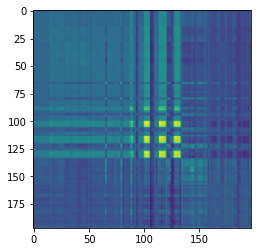

In [ ]:
# Attention Matrix
attention_matrix = q @ kT
print("attention matrix: ", attention_matrix.shape)
plt.imshow(attention_matrix[3].detach().cpu().numpy())

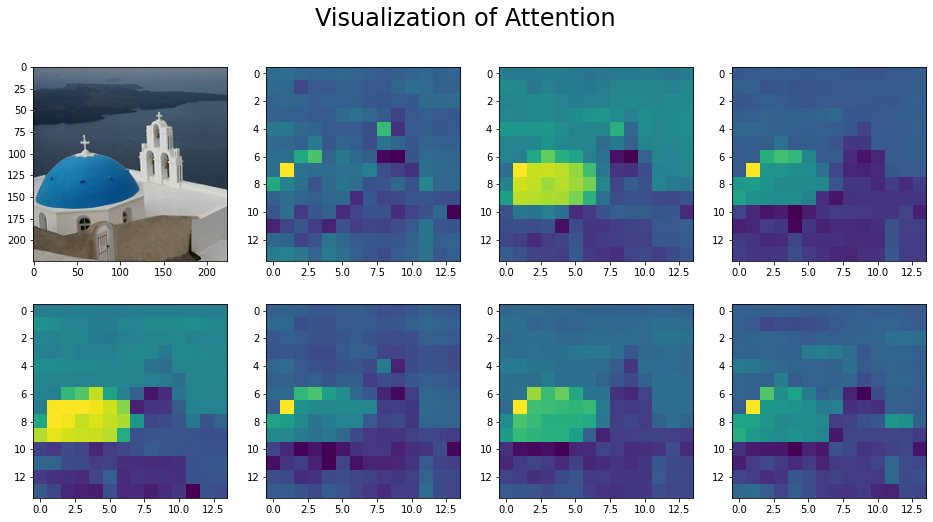

In [ ]:
# Visualize attention matrix
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Visualization of Attention", fontsize=24)
fig.add_axes()
img = np.asarray(img)
ax = fig.add_subplot(2, 4, 1)
ax.imshow(img)
for i in range(7):  # visualize the 100th rows of attention matrices in the 0-7th heads
    attn_heatmap = attention_matrix[i, 100, 1:].reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(2, 4, i+2)
    ax.imshow(attn_heatmap)

# 4. MLP (Classification) Head
The 0-th output vector from the transformer output vectors (corresponding to the class token input) is fed to the MLP head.  
The 1000-dimension classification result is the output of the whole pipeline.

Classification head:  Linear(in_features=768, out_features=1000, bias=True)
Inference result : id = 538, label name = dome



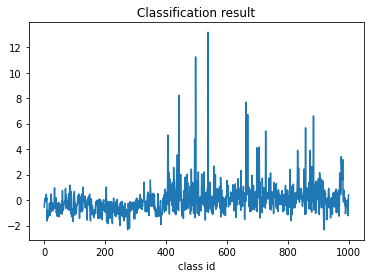

In [ ]:
print("Classification head: ", model.head)
result = model.head(transformer_output)
result_label_id = int(torch.argmax(result))
plt.plot(result.detach().cpu().numpy()[0])
plt.title("Classification result")
plt.xlabel("class id")
print("Inference result : id = {}, label name = {}".format(
    result_label_id, imagenet_labels[result_label_id]))